#Importing Data

In [ ]:
import numpy as np
import pandas as pd 
import math
import statistics 
import random 

url = 'https://raw.githubusercontent.com/RanjithKalingeri/housing-price-/main/carona_data%20-%20Sheet1.csv'
df = pd.read_csv(url)




df_random = df 
x_total = df_random[['Population Density(per km_sqaure)', 'Entire Population' , 'Health Care Index' , 'Avg Temperature' , 'DIst ' , 'Peak1' , 'Len1']]
y_total = df_random[['Peak2' , 'Len2' , 'PeakDIst']]
y_peak = df_random[['Peak2']]
y_len2 = df_random[['Len2']]
y_peakdist = df_random[['PeakDIst']]

X_total =x_total.to_numpy()
for i in range(72):
    X_total[i,1] = X_total[i,1].replace(',', '')
    print(X_total[i,1])

for i in range(72):
    X_total[i,0] = X_total[i,0].replace(',', '')
    print(X_total[i,0])

X_total = X_total.astype(np.float)





Y_peakdist =y_peakdist.to_numpy()
Y_len2 =y_len2.to_numpy()

Y_total =y_total.to_numpy()
Y_peak =y_peak.to_numpy()
Y_total = Y_total.astype(np.float)

print(X_total)
print(Y_total)


#Scikit learn implimentation

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize='True').fit(X_total, Y_total)

xt = [[ 382 ,1366000000 , 60, 25.8, 45, 93199 , 270]]
# enter your independent variables here 


#xt = xt.reshape(1,-1)

y_pred = model.predict(xt)
print(y_pred)


print('Coefficients: \n', model.coef_)
print('Coefficients: \n', model.intercept_)

[[1.68175146e+05 7.15683828e+01 1.20949575e+02]]
Coefficients: 
 [[-1.56763798e-01  3.05575809e-05  3.65749713e+02 -7.38872051e+01
   2.02228101e+01  1.35098347e+00 -1.14261443e+01]
 [ 6.02251677e-04  7.75177809e-08  1.18144797e+00 -2.28735542e+00
  -5.39498561e-02 -2.06617453e-03  2.99992623e-01]
 [-2.13464672e-03  1.07269974e-08  1.33974669e+00 -1.25178598e+00
   8.43163755e-01 -9.35952292e-04  2.71562353e-01]]
Coefficients: 
 [-17280.59445187     67.57106055     34.98882156]


#graph showing inverse relation between peak2 and avg temperature

[0.5342261904761905, 0.49851190476190477, 0.718452380952381, 0.5997023809523809, 0.37202380952380953, 0.8035714285714285, 0.3482142857142857, 0.5148809523809523, 0.34226190476190477, 0.44345238095238093, 0.800595238095238, 0.4732142857142857, 0.0, 0.9851190476190477, 0.3839285714285714, 0.8898809523809523, 0.8169642857142858, 0.20982142857142855, 0.47767857142857134, 0.4568452380952381, 0.40922619047619047, 0.9687499999999999, 0.900297619047619, 0.6651785714285714, 0.44940476190476186, 0.7604166666666665, 0.5595238095238094, 0.9017857142857142, 0.49107142857142855, 0.84375, 0.7336309523809523, 0.8958333333333334, 0.20535714285714282, 0.41666666666666663, 0.8110119047619048, 0.9151785714285714, 0.9821428571428571, 1.0, 0.9821428571428571, 0.8258928571428571, 0.7842261904761905, 0.4404761904761904, 0.5922619047619047, 0.8675595238095237, 0.7827380952380951, 0.400297619047619, 0.9672619047619048, 0.956845238095238, 0.45089285714285715, 0.2038690476190476, 0.7842261904761905, 0.75446428571

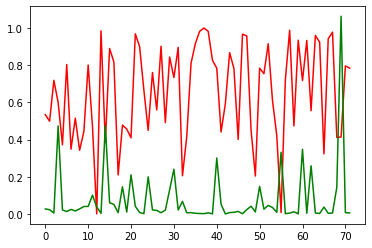

In [4]:
import matplotlib.pyplot as plt



totalpopulation = [sub[1] for sub in X_total]
peak = [sub[5] for sub in X_total]
peak = [sub[5] for sub in X_total]
temp = [sub[3] for sub in X_total]
density = [sub[0] for sub in X_total]


norm_population = (lambda the_max, the_min: [(float(i)-the_min)/(the_max-the_min) for i in totalpopulation])(max(totalpopulation),min(totalpopulation))
norm_peak = (lambda the_max, the_min: [(float(i)-the_min)/(the_max-the_min) for i in peak])(max(totalpopulation),min(peak))
norm_temp = (lambda the_max, the_min: [(float(i)-the_min)/(the_max-the_min) for i in temp])(max(temp),min(temp))


norm_peak = [element * pow(10,4) for element in norm_peak]


print(norm_temp)
print(norm_peak)

plt.plot(range(72), norm_temp, color = 'red')
plt.plot(range(72), norm_peak, color = 'green')




#graph showing direct relation between peak2 and total population

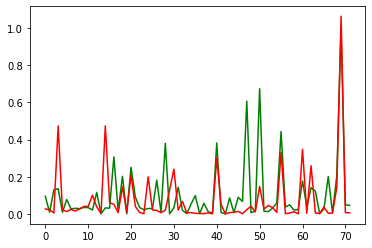

In [5]:
plt.plot(range(72), norm_population, color = 'green')
plt.plot(range(72), norm_peak, color = 'red')